<a href="https://colab.research.google.com/github/josefinacatoni/Fisica-2/blob/master/Animaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt

# Animaciones

Dada la evolución de una variable (posición, velocidad, etc), a veces verlo de manera animada ayuda a la comprensión. Con esta lbrería uno puede obtener de manera animada, la evolución de estas variables. Luego, estos videos se pueden guardar en formato mp4

In [ ]:
from matplotlib import animation, rc # librería de animaciones


En el caso de estar trabajando en un Notebook (Jupyter o google Colab), es necesario correr el siguiente código para poder visualizar la animación estando en formato inline

In [ ]:
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML

Primero, genero un vector que es el que quiero animar, por ejemplo la posición de una masa que se mueve como un coseno de frecuencia $\omega$

In [ ]:
w=2.0
t=np.linspace(0,4*np.pi/w,200)
y=0.4*np.cos(w*t)

Primero fijamos la figura, los ejes y la variable que queremos animar

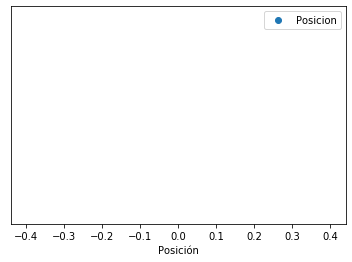

In [ ]:
var=y #variable que quiero animar
label='Posicion'
fig, ax = plt.subplots()

ax.set_xlim( min(var)-0.1*np.abs(min(var)), max(var)+0.1*np.abs(max(var)));
plt.xlabel('Posición');
plt.yticks([]) #Para que no aparezcan los números sobre el eje y
line, = ax.plot([], [],'o',label=label)
plt.legend()

**Vamos a definir la función de animación:** \\
Esta función contiene la información de qué queremos graficar instante a instante. Esta función será llamada iteradamente.

In [ ]:
def animate(i):
    x = var[i]
    altura = 0
    line.set_data(x, altura)
    return (line,)

Finalmente corremos la animación. Los argumentos principales de la función son: \\
$\;\;$ -Figura sobre la cual animar \\
$\;\;$ -Función de animación \\

Algunos otros argumentos útiles según necesidad: \\
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames=len(y), interval=5*2*np.pi/w)

anim

**OTRO EJEMPLO: EVOLUCIÓN DE UN VECTOR**

Supongamos el ejemplo de la cuerda con extremos fijos... uno llega a la solución de un modo normal de oscilación:

$\psi^{(p)}(x,t)=A^{(p)} \, sen(k^{(p)}x) \, cos(\omega^{(p)} t + \varphi^{(p)})$

con $k^{(p)}=\frac{p \pi}{L}$ y $\omega^{(p)}=\sqrt{\frac{T_{o}}{\mu}}\frac{p\pi}{L}$

In [ ]:
L=10.0
To=0.5
mu=0.05

k2=2*np.pi/L
w2=np.sqrt(To/mu)*k2

x=np.linspace(0,L,500)
t=np.linspace(0,2*np.pi/w2,200)

phi2=np.zeros((len(t),len(x)))

for i in range(len(t)):
  phi2[i,:]=np.sin(k2*x)*np.cos(w2*t[i])

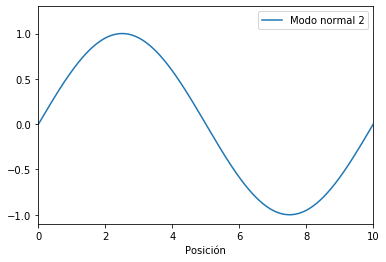

In [ ]:
var=phi2 #variable que quiero animar
label='Modo normal 2'
fig, ax = plt.subplots()

ax.set_xlim(0,L);
ax.set_ylim(-1.1,1.3);
plt.xlabel('Posición');
line, = ax.plot([], [],label=label)
plt.legend()

def animate(i):
    X = x
    Y = var[i,:]
    line.set_data(X,Y)
    return (line,)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=5*2*np.pi/w2)

anim2

**PÉNDULOS ACOPLADOS**

In [ ]:
g=9.81
L=0.5
m=1.0
k=0.9

w1=np.sqrt(g/L)
w2=np.sqrt(g/L+2*k/m)

w_medio=(w1+w2)/2.0
w_dif=(w2-w1)/2.0

t=np.linspace(0,2*np.pi/w_dif,1000)

psia=0.05*np.sin(w_medio*t)*np.sin(w_dif*t)
psib=0.05*np.cos(w_medio*t)*np.cos(w_dif*t)



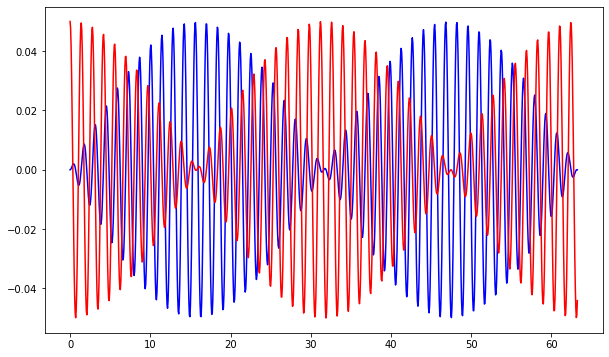

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t,psia,'b')
plt.plot(t,psib,'r')

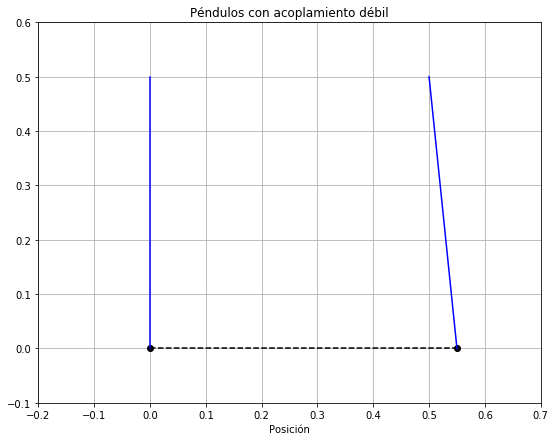

In [ ]:
var1=psia #variable que quiero animar
var2=psib #variable que quiero animar


fig, ax = plt.subplots(figsize=(9,7))

ax.set_xlim(-0.2,0.7);
ax.set_ylim(-0.1,0.6);
plt.xlabel('Posición');
plt.title('Péndulos con acoplamiento débil')

line1, = ax.plot([], [],'ok--')
line2, = ax.plot([], [],'b-')
line3, = ax.plot([], [],'b-')

plt.grid()


def animate(i):
    X = [var1[i],0.5+var2[i]]
    Y = [0,0]
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[L,0])
    line3.set_data([0.5,0.5+var2[i]],[L,0])
    return (line,)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=2*np.pi/w_dif)

anim2